In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier 
from sklearn.metrics import accuracy_score

from utils import make_dataset, preprocess_txt, create_corpus, create_vocab, show_most_freq_n

%reload_ext autoreload
%autoreload 2

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read all datasets
df_appceleratorstudio = pd.read_csv('./data/appceleratorstudio.csv')
df_aptanastudio = pd.read_csv('./data/aptanastudio.csv')
df_bamboo = pd.read_csv('./data/bamboo.csv')
df_clover = pd.read_csv('./data/clover.csv')
df_datamanagement = pd.read_csv('./data/datamanagement.csv')
df_duracloud = pd.read_csv('./data/duracloud.csv')
df_jirasoftware = pd.read_csv('./data/jirasoftware.csv')
df_mesos = pd.read_csv('./data/mesos.csv')
df_moodle = pd.read_csv('./data/moodle.csv')
df_mule = pd.read_csv('./data/mule.csv')
df_mulestudio = pd.read_csv('./data/mulestudio.csv')
df_springxd = pd.read_csv('./data/springxd.csv')
df_talenddataquality = pd.read_csv('./data/talenddataquality.csv')
df_talendesb = pd.read_csv('./data/talendesb.csv')
df_titanium = pd.read_csv('./data/titanium.csv')
df_usergrid = pd.read_csv('./data/usergrid.csv')

In [3]:
dataset_arr = [df_appceleratorstudio,
        df_aptanastudio,
        df_bamboo,
        df_clover,
        df_datamanagement,
        df_duracloud,
        df_jirasoftware,
        df_mesos,
        df_moodle,
        df_mule,
        df_mulestudio,
        df_springxd,
        df_talenddataquality,
        df_talendesb,
        df_titanium,
        df_usergrid]

In [4]:
#get union of datasets
text, labels = make_dataset(dataset_arr)

#create corpus
corpus, labels = create_corpus(text, labels)
len(corpus), len(labels)

(20760, 20760)

In [6]:
#create vocabulary
vocab = create_vocab(corpus)
len(vocab)

22550

In [7]:
# exp. check existance of these 2 words in our corpus
'jira' in vocab, 'Jira' in vocab

(True, False)

In [8]:
# load pre-trained w2v model
model = KeyedVectors.load_word2vec_format("./data/GoogleNews-vectors-negative300.bin",  binary = True)

In [9]:
# check word 'Jira' existance in pre-trained model
model['Jira'].shape

(300,)

In [10]:
# check word 'jira' existance in pre-trained model
model['jira'].shape

KeyError: "word 'jira' not in vocabulary"

In [11]:
#words count in the pre-trained model
len(model.vocab.keys())

3000000

In [12]:
#exp check the difference of two sets
A=set((1,2,6))
B=set((1,2,3,4))
A-B

{6}

In [13]:
# the tokens count that are in our corpus but misses from the pre-traned model
new_elements = vocab - set(model.vocab.keys())
print("new words count in vocabulary", len(new_elements))
print("in common words count in vocabulary and pre-trained model", len(vocab) - len(new_elements))

new words count in vocabulary 12513
in common words count in vocabulary and pre-trained model 10037


In [14]:
# get most common words list from our vocabulary
corpus_as_words = [token for doc in corpus for token in doc]
most_common_items = nltk.FreqDist(corpus_as_words).most_common(50)
most_common_items[:5]

[('code', 9914),
 ('error', 8402),
 ('file', 6575),
 ('create', 6535),
 ('add', 5695)]

In [15]:
# get most common words key list from our vocabulary
most_common = [k for k,i in most_common_items]
print(most_common)

['code', 'error', 'file', 'create', 'add', 'test', 'project', 'new', 'studio', 'run', 'build', 'user', 'result', 'use', 'need', 'module', 'update', 'step', 'fail', 'version', 'app', 'message', 'set', 'work', 'info', 'support', 'change', 'android', 'log', 'issue', 'titanium', 'window', 'default', 'sdk', 'var', 'like', 'start', 'property', 'type', 'value', 'method', 'expect', 'open', 'job', 'select', 'function', 'line', 'master', 'source', 'remove']


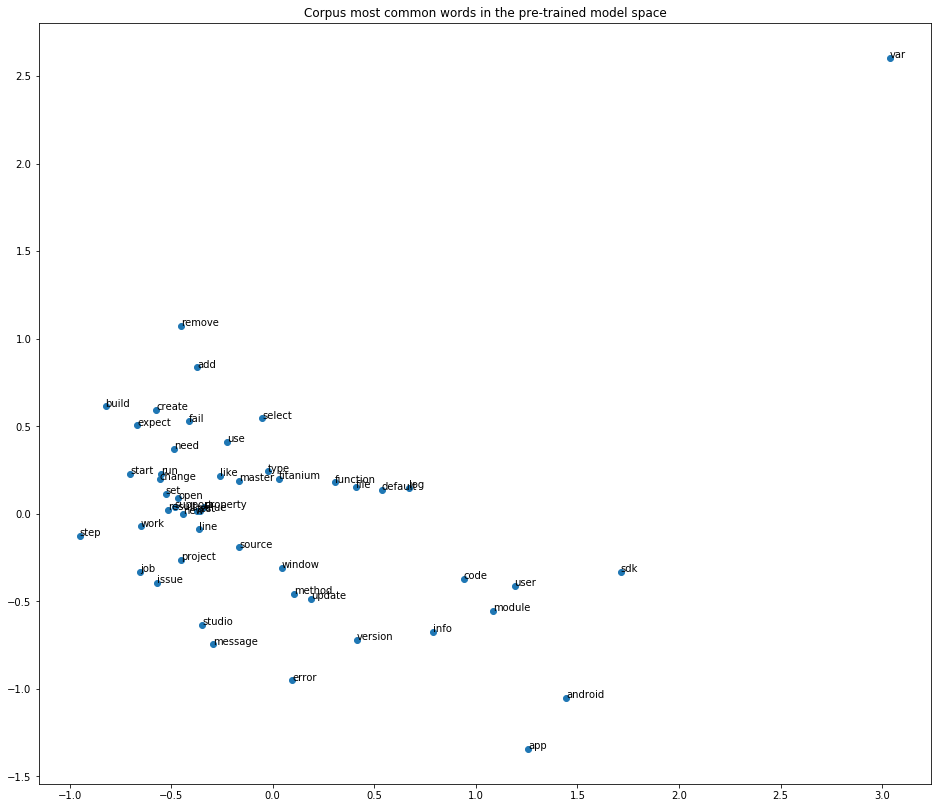

In [22]:
X = [model[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.figure(figsize=(16,14))    
plt.title('Corpus most common words in the pre-trained model space')
plt.scatter(result[:, 0], result[:, 1], )
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show();

In [18]:
model_2 = Word2Vec(size=300, min_count=1)
model_2.corpus_count, model_2.wv.vocab

(0, {})

In [19]:
model_2.build_vocab(corpus)
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(20760,
 22550,
 {'vp': <gensim.models.keyedvectors.Vocab at 0x7fabcc18e6d8>,
  'sample': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a9e8>,
  'ism': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7f0>,
  'rtx': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a780>,
  'blaht': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7b8>,
  'guide': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a3c8>,
  'apsanalyticsmodel': <gensim.models.keyedvectors.Vocab at 0x7faa52c0aa90>,
  'inste': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a748>,
  'scratchpad': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a550>,
  'fixeddelay': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a588>,
  'aforementioned': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a5c0>,
  'junk': <gensim.models.keyedvectors.Vocab at 0x7faa50b05c50>,
  'baed': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a668>,
  'payment': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a630>,
  'azimuth': <gensim.models.keyedvectors.Vocab at

In [20]:
model_2['jira'].shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(300,)

In [21]:
model_2['Jira'].shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'Jira' not in vocabulary"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


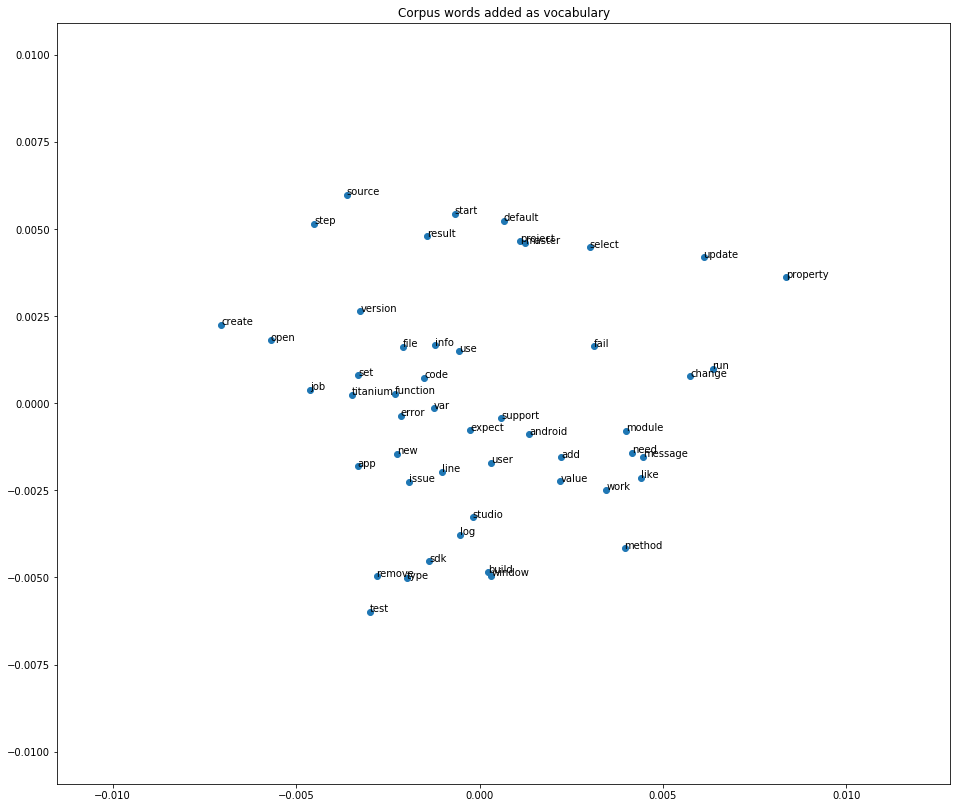

In [23]:
X_2 = [model_2[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X_2)
# create a scatter plot of the projection
plt.figure(figsize=(16,14))    
plt.title('Corpus words added as vocabulary')
plt.scatter(result[:, 0], result[:, 1], )
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show();

In [24]:
model_2.build_vocab(list(model.vocab.keys()), update=True)

In [25]:
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(3000000,
 23837,
 {'vp': <gensim.models.keyedvectors.Vocab at 0x7fabcc18e6d8>,
  'sample': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a9e8>,
  '\uf0d6': <gensim.models.keyedvectors.Vocab at 0x7faa506b8908>,
  'ism': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7f0>,
  'rtx': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a780>,
  'blaht': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7b8>,
  'guide': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a3c8>,
  'apsanalyticsmodel': <gensim.models.keyedvectors.Vocab at 0x7faa52c0aa90>,
  'inste': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a748>,
  'scratchpad': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a550>,
  'fixeddelay': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a588>,
  'aforementioned': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a5c0>,
  'junk': <gensim.models.keyedvectors.Vocab at 0x7faa50b05c50>,
  'baed': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a668>,
  'payment': <gensim.models.keyedvectors.Vocab a

In [26]:
model_2['Jira'].shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'Jira' not in vocabulary"

In [27]:
model_2['jira'].shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(300,)

In [28]:
model_2.intersect_word2vec_format("./data/GoogleNews-vectors-negative300.bin", binary=True)

In [29]:
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(3000000,
 23837,
 {'vp': <gensim.models.keyedvectors.Vocab at 0x7fabcc18e6d8>,
  'sample': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a9e8>,
  '\uf0d6': <gensim.models.keyedvectors.Vocab at 0x7faa506b8908>,
  'ism': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7f0>,
  'rtx': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a780>,
  'blaht': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7b8>,
  'guide': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a3c8>,
  'apsanalyticsmodel': <gensim.models.keyedvectors.Vocab at 0x7faa52c0aa90>,
  'inste': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a748>,
  'scratchpad': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a550>,
  'fixeddelay': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a588>,
  'aforementioned': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a5c0>,
  'junk': <gensim.models.keyedvectors.Vocab at 0x7faa50b05c50>,
  'baed': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a668>,
  'payment': <gensim.models.keyedvectors.Vocab a

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


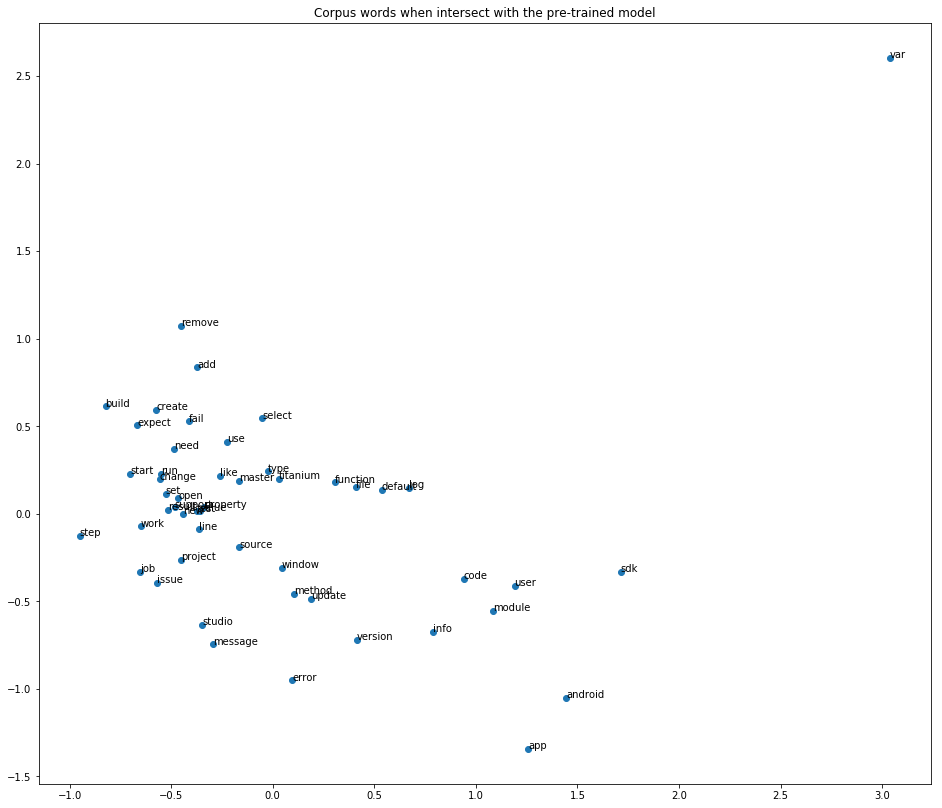

In [31]:
X_2 = [model_2[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X_2)
# create a scatter plot of the projection
plt.figure(figsize=(16,14))    
plt.title('Corpus words when intersect with the pre-trained model')
plt.scatter(result[:, 0], result[:, 1], )
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show();

In [37]:
model_2.train(corpus, total_examples=model_2.corpus_count, epochs=100)

(72433057, 78630300)

In [38]:
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(3000000,
 23837,
 {'vp': <gensim.models.keyedvectors.Vocab at 0x7fabcc18e6d8>,
  'sample': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a9e8>,
  '\uf0d6': <gensim.models.keyedvectors.Vocab at 0x7faa506b8908>,
  'ism': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7f0>,
  'rtx': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a780>,
  'blaht': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a7b8>,
  'guide': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a3c8>,
  'apsanalyticsmodel': <gensim.models.keyedvectors.Vocab at 0x7faa52c0aa90>,
  'inste': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a748>,
  'scratchpad': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a550>,
  'fixeddelay': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a588>,
  'aforementioned': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a5c0>,
  'junk': <gensim.models.keyedvectors.Vocab at 0x7faa50b05c50>,
  'baed': <gensim.models.keyedvectors.Vocab at 0x7faa52c0a668>,
  'payment': <gensim.models.keyedvectors.Vocab a

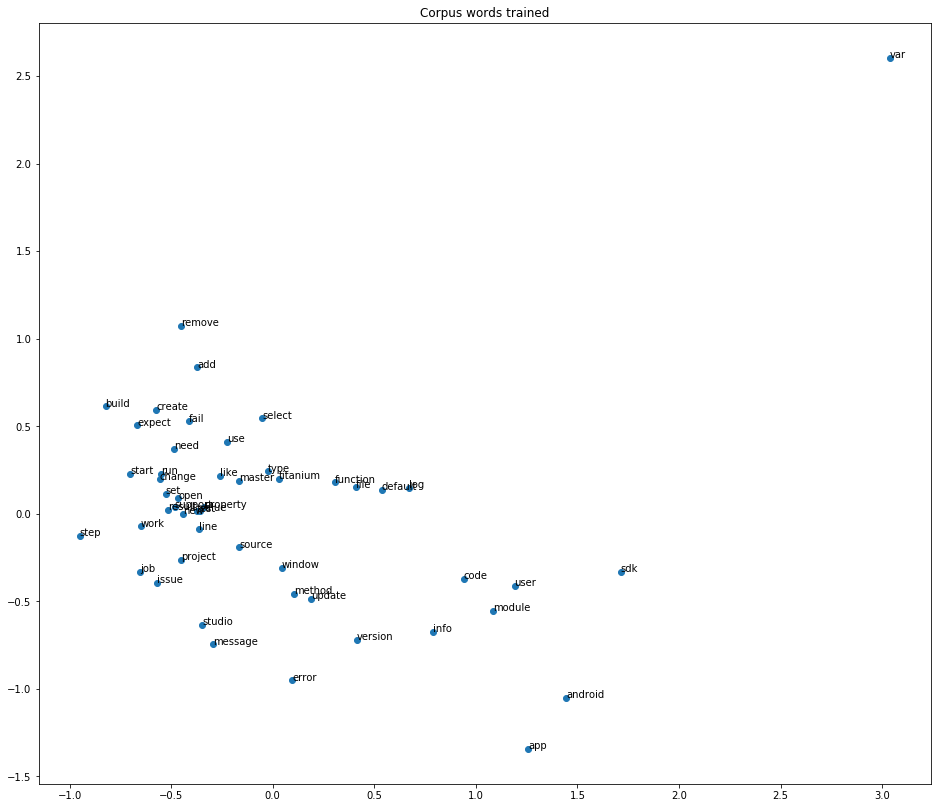

In [57]:
X_2 = [model_2[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X_2)
# create a scatter plot of the projection
plt.figure(figsize=(16,14))    
plt.title('Corpus words trained')
plt.scatter(result[:, 0], result[:, 1], )
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show();

## Corpus Features

In [58]:
len(model_2.wv.vocab)

23837

In [59]:
'jira' in model_2

True

In [68]:
'Jira' in model_2

False

In [60]:
len(model_2['jira'])

300

In [61]:
model_2.vector_size

300

In [62]:
def doc_feature_extraction(doc, w2v_model):
    feature_dim = w2v_model.vector_size
    doc_feautures = np.zeros(feature_dim, dtype='float64')
    for token in doc:
        doc_feautures += w2v_model[token]
    assert len(doc) != 0, doc
    doc_feautures = doc_feautures / len(doc)    
    assert len(doc_feautures) == feature_dim
    
    return  doc_feautures

In [63]:
def corpus_feature_extraction(corpus, w2v_model):
    corpus_features = [doc_feature_extraction(doc, w2v_model) for doc in corpus]
    
    return corpus_features

In [64]:
corpus_features = corpus_feature_extraction(corpus, model_2)

In [65]:
len(corpus_features), len(corpus_features[0])

(20760, 300)

## Classification and prediction

In [69]:
features_train, features_test, labels_train, labels_test = train_test_split(corpus_features, labels, test_size=0.3, random_state=111)

In [70]:
svc = LinearSVC(multi_class='crammer_singer')
knc = KNeighborsClassifier(n_neighbors=50)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=10000)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [75]:
clfs = {'SVC' : svc,'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [76]:
def train_clf(clf, train_x, train_y):
    clf.fit(train_x, train_y)

In [77]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [78]:
pred_scores = []
for k,v in clfs.items():
    train_clf(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [79]:
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.sort_values(by=['Score'])

,Score
SVC,0.171484
DT,0.229287
AdaBoost,0.260276
ETC,0.261721
BgC,0.266859
RF,0.281150
KN,0.290784
LR,0.300578


In [80]:
# from previous method
tf_idf_scores_sorted = [('AdaBoost', [0.249318]),
 ('BgC', [0.310323]),
 ('DT', [0.273559]),
 ('ETC', [0.318510]),
 ('KN', [0.307272]),
 ('LR', [0.322203]),
 ('RF', [0.327821]),
 ('SVC', [0.307594])]

In [81]:
tf_idf_df = pd.DataFrame.from_items(tf_idf_scores_sorted, orient='index', columns=['TF-IDF'])
tf_idf_df

,TF-IDF
AdaBoost,0.249318
BgC,0.310323
DT,0.273559
ETC,0.318510
KN,0.307272
LR,0.322203
RF,0.327821
SVC,0.307594


In [85]:
w2v_scores_sorted = sorted(pred_scores, key=lambda x: x[0])
w2v_df = pd.DataFrame.from_items(w2v_scores_sorted, orient='index', columns=['Word2Vec'])
w2v_df

,Word2Vec
AdaBoost,0.260276
BgC,0.266859
DT,0.229287
ETC,0.261721
KN,0.290784
LR,0.300578
RF,0.281150
SVC,0.171484


In [86]:
df_compare = pd.DataFrame.join(tf_idf_df, w2v_df)
df_compare

,TF-IDF,Word2Vec
AdaBoost,0.249318,0.260276
BgC,0.310323,0.266859
DT,0.273559,0.229287
ETC,0.318510,0.261721
KN,0.307272,0.290784
LR,0.322203,0.300578
RF,0.327821,0.281150
SVC,0.307594,0.171484


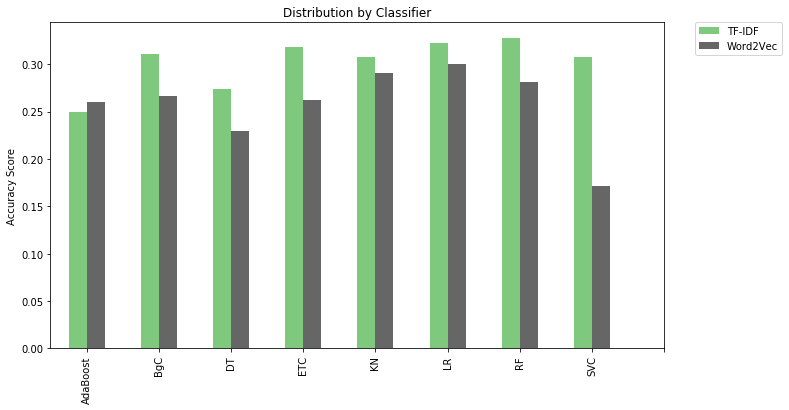

In [87]:
df_compare.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_compare.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);